In [1]:
# Importing Libaries to create plots, and load data from Excel
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os
import math

In [8]:
cmap = plt.cm.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1.5, 12)]

file = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Brighway\Data.xlsx'
data = pd.read_excel(file, sheet_name='Births cost per ton')
data_FU = pd.read_excel(file, sheet_name='FU cost pr ton')

save_dir = r'Cost pr ton'
# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

data_plot = data[data.columns[1:]]
data_plot_FU = data_FU[data_FU.columns[1:]]
data_leg = data[data.columns[0]].to_list()

data_plot_FU

C:\Users\ruw\AppData\Local\Temp\8\ipykernel_33600\702029164.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20')


,MDU,CDU
0,NaN,NaN


In [4]:
plot_leg = ['Upper limit']

for i in range(len(data_leg)):
    plot_leg.append(data_leg[i])
    
plot_leg

['Upper limit', 'Net savings']

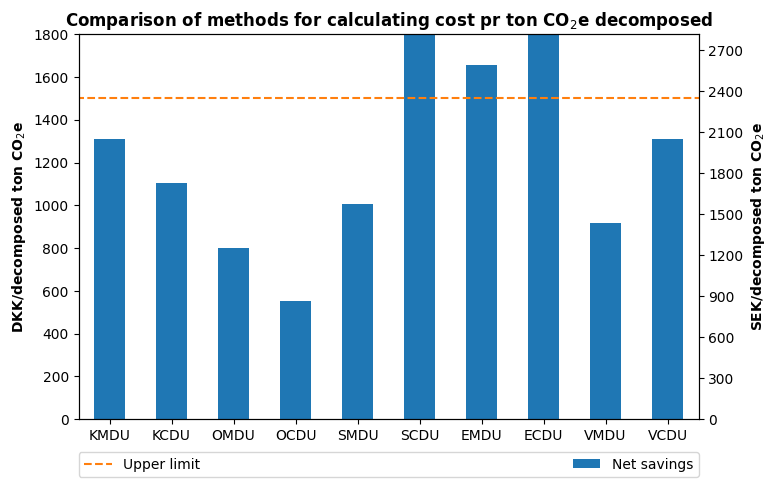

In [5]:
df_transposed = data_plot.T

# Plot the transposed DataFrame
df_transposed.plot(kind='bar', figsize=(8, 5), color=colors)

# Set the title and labels
plt.title('Comparison of methods for calculating cost pr ton CO$_2$e decomposed', weight='bold')
plt.ylabel('DKK/decomposed ton CO$_2$e',weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

plt.ylim(0, 1800)
plt.yticks(np.arange(0, 1850, step=200))
plt.hlines(1500, -2, 14, color=colors[1], linestyle='dashed')




# Set the legend
plt.legend(plot_leg, bbox_to_anchor=(-0, -0.15, 1, 0.2), loc="lower left",
           mode="expand", borderaxespad=0, ncol=4)

ax2 = plt.twinx()
ax2.set_ylim(0, 1800 * 1.50833 + 100)
ax2.set_ylabel('SEK/decomposed ton CO$_2$e', weight='bold')

# Calculate the secondary y-axis ticks based on the primary y-axis ticks
secondary_yticks = np.arange(0, 1800 * 1.50833 + 10, step=300)
ax2.set_yticks(secondary_yticks)
ax2.set_yticklabels([f'{tick:.0f}' for tick in secondary_yticks])

# Display the plot
plt.savefig(os.path.join(save_dir, 'Cost_pr_ton_hospitals.jpg'), bbox_inches='tight')
plt.show()

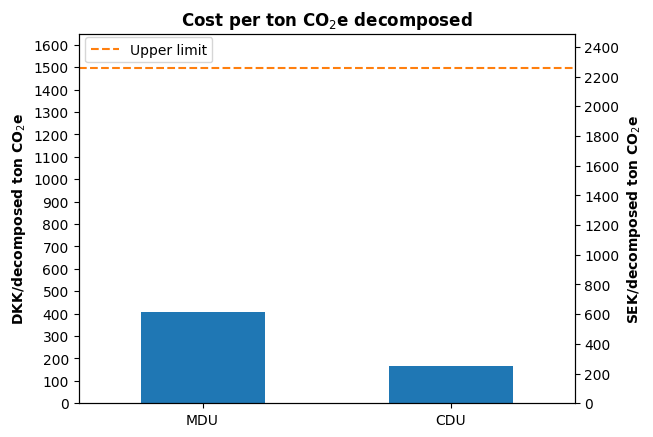

In [6]:
# Assuming df_transposed and colors are already defined
df_transposed = data_plot_FU.T

# Plot the transposed DataFrame
fig, ax1 = plt.subplots()

df_transposed.plot(kind='bar', ax=ax1, color=colors)

# Set the title and labels
ax1.set_title('Cost per ton CO$_2$e decomposed', weight='bold')
ax1.set_ylabel('DKK/decomposed ton CO$_2$e', weight='bold')

# Rotate x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Set y-axis limits and ticks for the primary y-axis
ax1.set_ylim(0, 1650)
ax1.set_yticks(np.arange(0, 1601, step=100))

# Draw a horizontal line
ax1.hlines(1500 - 2, xmin=-0.5, xmax=4, color=colors[1], linestyle='dashed')

# Create the secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylim(0, 1650 * 1.50833)
ax2.set_ylabel('SEK/decomposed ton CO$_2$e', weight='bold')

# Calculate the secondary y-axis ticks based on the primary y-axis ticks
secondary_yticks = np.arange(0, 1600 * 1.50833, step=200)
ax2.set_yticks(secondary_yticks)
ax2.set_yticklabels([f'{tick:.0f}' for tick in secondary_yticks])

ax1.legend(['Upper limit'], loc='upper right', bbox_to_anchor=(0.27, 0.99), borderaxespad=0,)

# Save the plot
plt.savefig(os.path.join(save_dir, 'Cost_pr_ton_FU.jpg'), bbox_inches='tight')

# Display the plot
plt.show()

In [7]:
data_AE = pd.read_excel(file, sheet_name='FU annual emissions')

data_AE

,No DU,MDU,CDU
0,200.041054,46.357353,46.152534


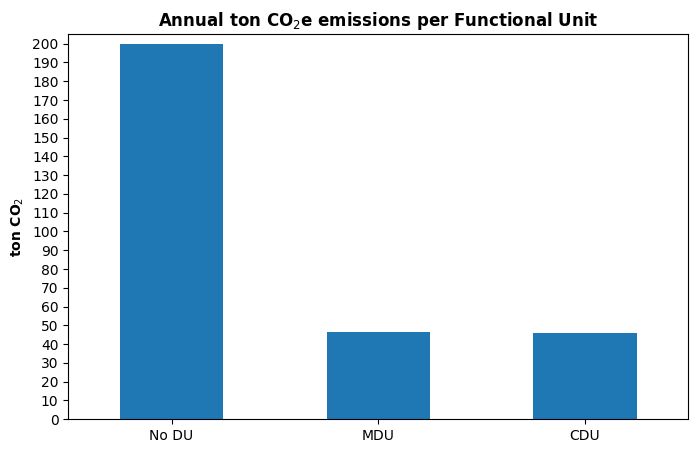

In [8]:
# Assuming df_transposed and colors are already defined
df_transposed = data_AE.T

# Plot the transposed DataFrame
fig, ax1 = plt.subplots(figsize=(8, 5))

df_transposed.plot(kind='bar', ax=ax1, color=colors)

# Set the title and labels
plt.title('Annual ton CO$_2$e emissions per Functional Unit', weight='bold')
plt.ylabel('ton CO$_2$',weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

plt.ylim(0, 205)
plt.yticks(np.arange(0, 205, step=10))



ax1.get_legend().remove()
# Display the plot
plt.savefig(os.path.join(save_dir, 'Annual_emissions_FU.jpg'), bbox_inches='tight')
plt.show()

In [9]:
data_sens = pd.read_excel(file, sheet_name='Cost pr ton sensi')

data_sens_plt = data_sens[data_sens.columns[1:]]
data_sens_plt

lst_leg = data_sens.columns[1:]

leg = ['Upper limit']

for i in range(len(lst_leg)):
    leg.append(lst_leg[i])
    
data_sens_plt

,PME,AIC,AAC
0,409.060682,408.771152,408.768336
1,165.547688,165.430671,165.429533


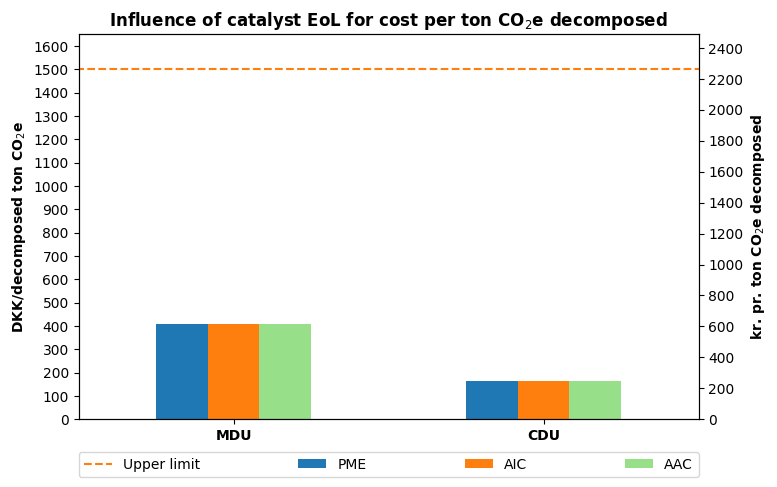

In [10]:


# Plot the transposed DataFrame
fig, ax1 = plt.subplots(figsize=(8, 5))

data_sens_plt.plot(kind='bar', ax=ax1, color=colors)

# Set the title and labels
ax1.set_title('Influence of catalyst EoL for cost per ton CO$_2$e decomposed', weight='bold')
ax1.set_ylabel('DKK/decomposed ton CO$_2$e', weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

plt.ylim(0, 16)
plt.yticks(np.arange(0, 205, step=10))

# Set y-axis limits and ticks for the primary y-axis
ax1.set_ylim(0, 1650)
ax1.set_yticks(np.arange(0, 1650, step=100))

# Draw a horizontal line
ax1.hlines(1500, xmin=-5, xmax=4, color=colors[1], linestyle='dashed')

# Create the secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylim(0, 1650 * 1.50833)
ax2.set_ylabel('SEK/decomposed ton CO$_2$e', weight='bold')

# Calculate the secondary y-axis ticks based on the primary y-axis ticks
secondary_yticks = np.arange(0, 1650 * 1.50833, step=200)
ax2.set_yticks(secondary_yticks)
ax2.set_yticklabels([f'{tick:.0f}' for tick in secondary_yticks])

ax1.set_xticklabels(data_sens[data_sens.columns[0]],weight='bold')

plt.ylabel('kr. pr. ton CO$_2$e decomposed', weight='bold')

ax1.legend(leg, bbox_to_anchor=(0, -0.15, 1, 0.2), loc="lower left",
            mode="expand", borderaxespad=0, ncol=4)



# Display the plot
plt.savefig(os.path.join(save_dir, 'Cost_pr_ton_sens.jpg'), bbox_inches='tight')
plt.show()

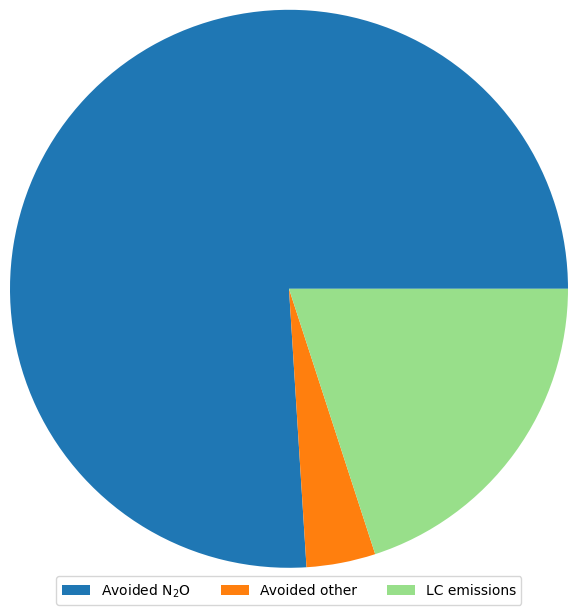

In [12]:

labels = 'Avoided N$_2$O', 'Avoided other', 'LC emissions'
sizes = [190, 10, 50]

fig, ax = plt.subplots(figsize=(6, 8))
ax.pie(sizes,  colors = colors, radius=1.5)
ax.legend(labels, bbox_to_anchor=(0, -.18, 1, 0.2), loc="lower left",
            mode="expand", borderaxespad=0, ncol=3)

# Display the plot
plt.savefig(os.path.join(save_dir, 'saving_pie_chart.jpg'), bbox_inches='tight')
plt.show()